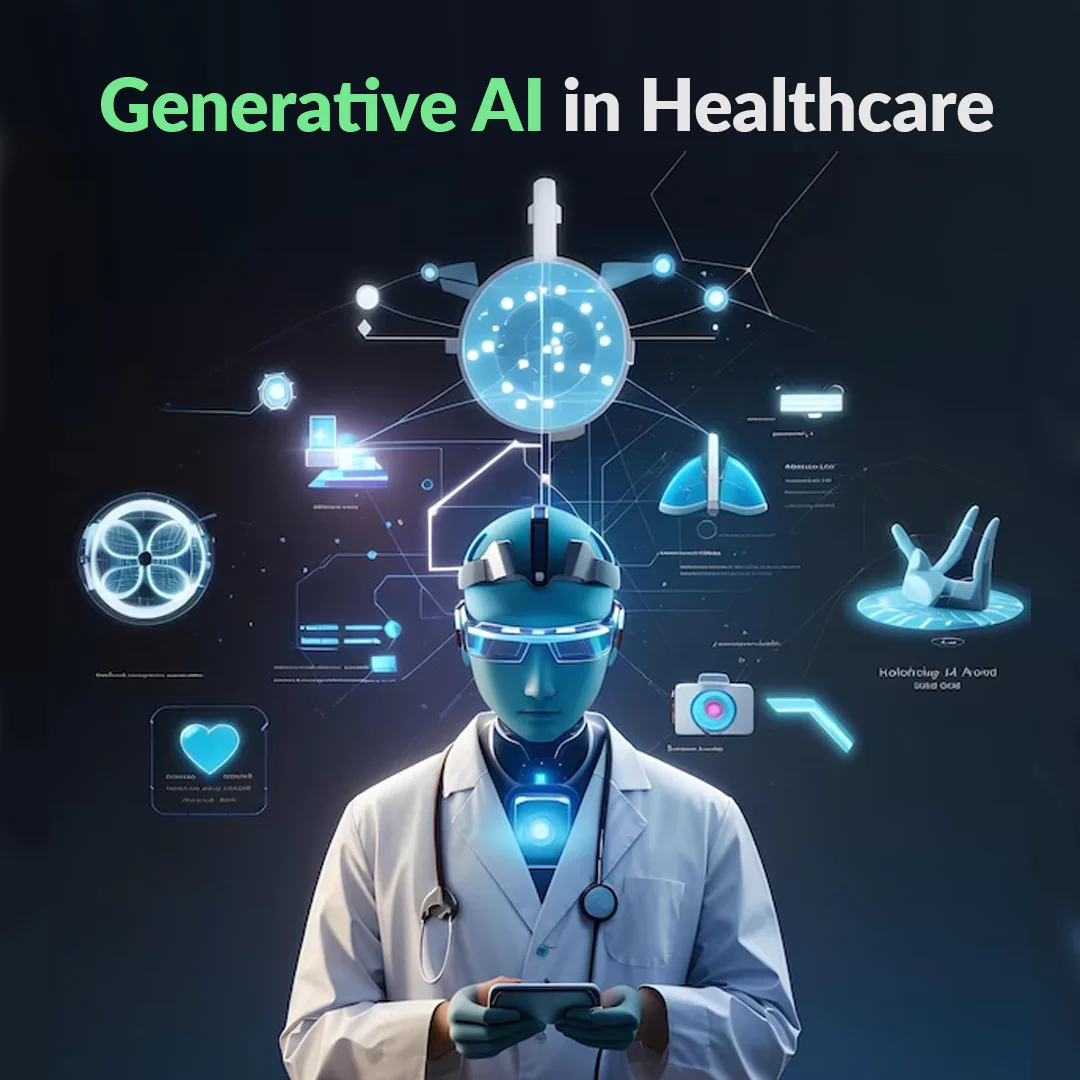

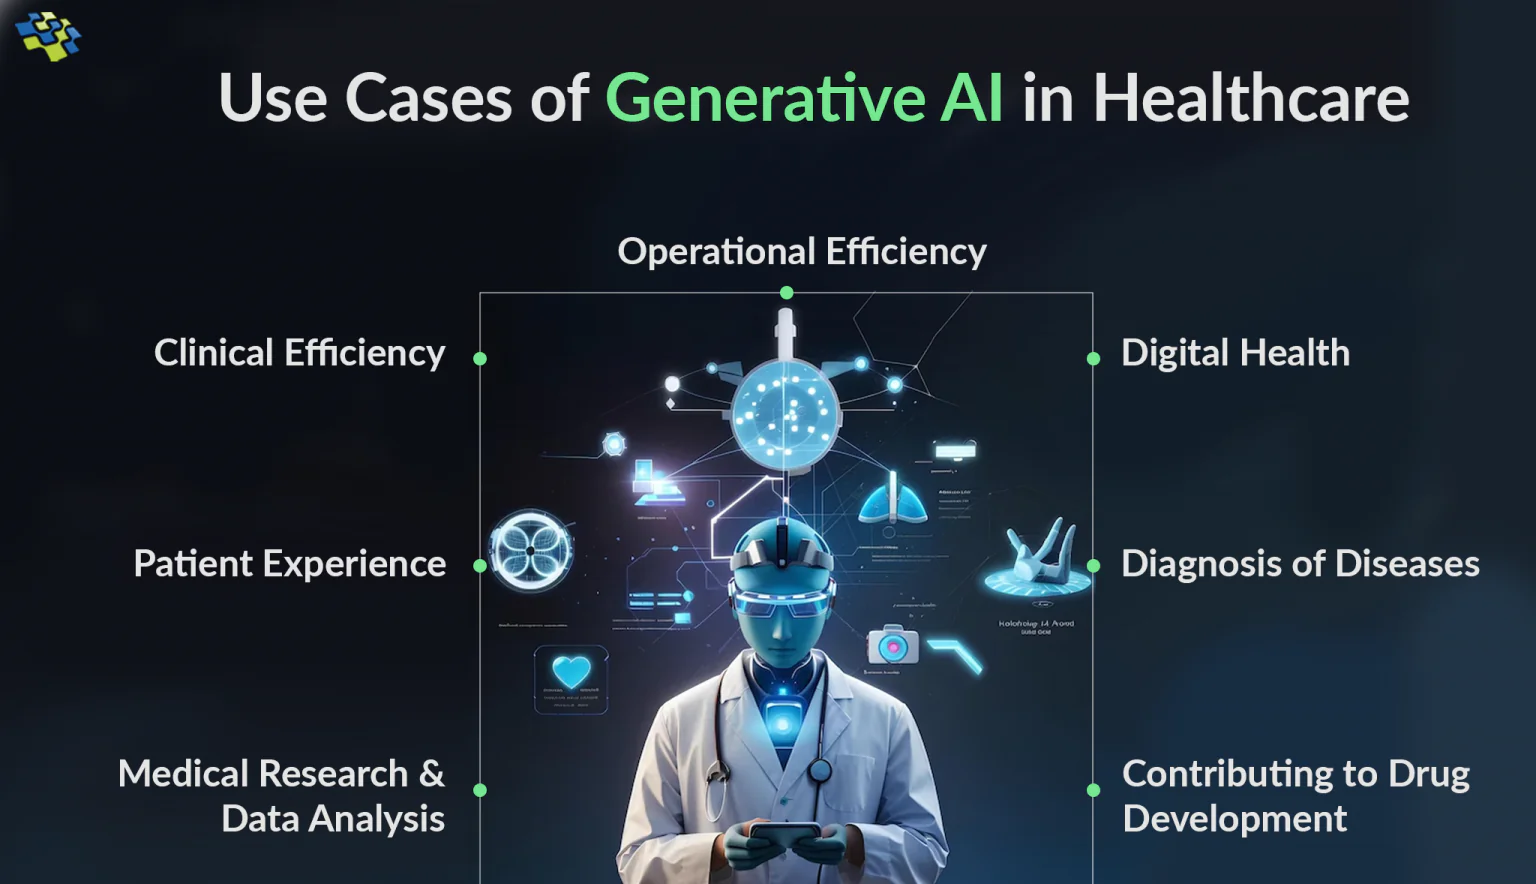

In [1]:
# Importation de la bibliothèque pour monter Google Drive
from google.colab import drive
# Montage de Google Drive pour accéder aux fichiers stockés dans votre espace de stockage Google
drive.mount("/content/mydrive")

Mounted at /content/mydrive


In [3]:
# Changement de répertoire vers le dossier "healthcare" dans Google Drive pour faciliter l'accès aux fichiers
%cd /content/mydrive/MyDrive/healthcare


/content/mydrive/MyDrive/healthcare


## Import Dependencies

In [4]:
import warnings

# Suppression de tous les avertissements pour un affichage plus clair des sorties
warnings.filterwarnings("ignore")


In [5]:
# Importation de numpy pour les opérations numériques avancées, notamment les calculs de tableaux
import numpy as np

# Importation de pandas pour la manipulation et l'analyse de données en DataFrame
import pandas as pd

# Importation de seaborn pour la visualisation statistique des données
import seaborn as sns

# Importation de matplotlib pour la création de graphiques
import matplotlib.pyplot as plt

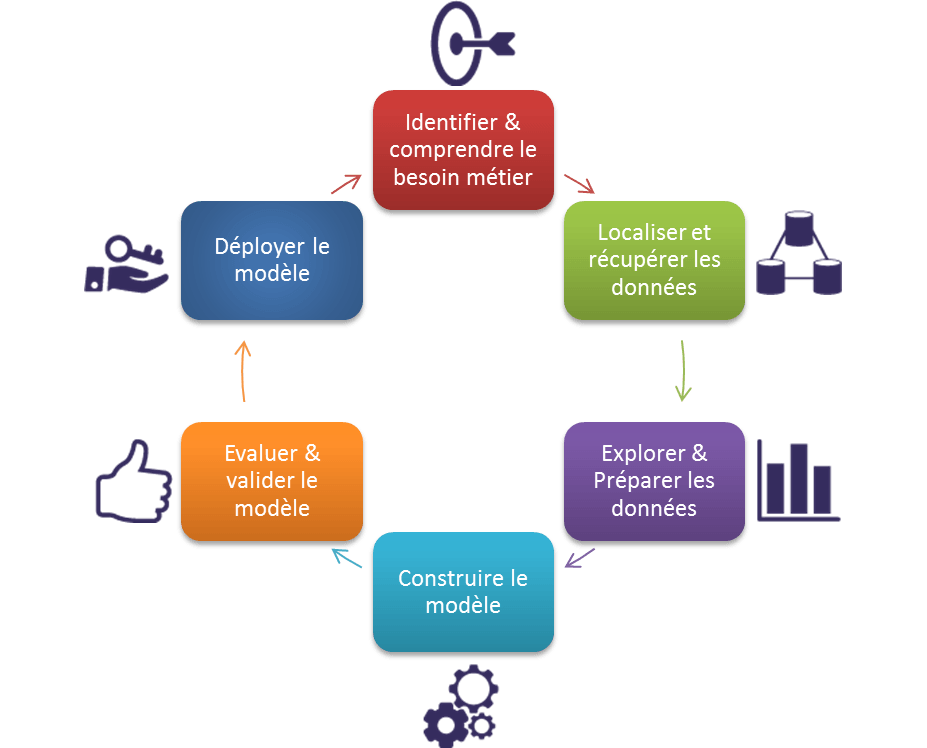

## Load Training Data From Drive

In [6]:
# Chargement des données depuis un fichier CSV de soins de santé
data = pd.read_csv("/content/mydrive/MyDrive/healthcare/healthcare_-_train.csv.csv")

In [7]:
# Affichage des cinq premières lignes du DataFrame pour examiner un aperçu des données
data.head()

,Unnamed: 0,prompt,response
0,NaN,Who is at risk for Lymphocytic Choriomeningiti...,LCMV infections can occur after exposure to fr...
1,NaN,What are the symptoms of Lymphocytic Choriomen...,LCMV is most commonly recognized as causing ne...
2,NaN,Who is at risk for Lymphocytic Choriomeningiti...,Individuals of all ages who come into contact ...
3,NaN,How to diagnose Lymphocytic Choriomeningitis (...,"During the first phase of the disease, the mos..."
4,NaN,What are the treatments for Lymphocytic Chorio...,"Aseptic meningitis, encephalitis, or meningoen..."


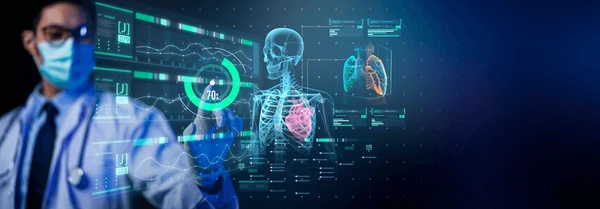

## Clean and Preprocess Data

In [8]:
# Création d'un nouveau DataFrame contenant uniquement les colonnes 'prompt' et 'response'
new_data = data[['prompt', 'response']]

In [9]:
new_data.head()

,prompt,response
0,Who is at risk for Lymphocytic Choriomeningiti...,LCMV infections can occur after exposure to fr...
1,What are the symptoms of Lymphocytic Choriomen...,LCMV is most commonly recognized as causing ne...
2,Who is at risk for Lymphocytic Choriomeningiti...,Individuals of all ages who come into contact ...
3,How to diagnose Lymphocytic Choriomeningitis (...,"During the first phase of the disease, the mos..."
4,What are the treatments for Lymphocytic Chorio...,"Aseptic meningitis, encephalitis, or meningoen..."


In [10]:
# Compter le nombre total de lignes dupliquées dans le DataFrame `new_data`
# et le nombre de doublons spécifiques dans la colonne 'prompt'.
# La première ligne calcule les doublons dans toutes les colonnes,
# tandis que la seconde se limite à la colonne 'prompt' pour identifier les répétitions basées sur cette seule colonne.
# Affichage du nombre total de doublons dans le DataFrame 'new_data' (toutes colonnes confondues)

print(new_data.duplicated().sum())  # Affiche 0, indiquant qu'il n'y a aucun doublon complet dans 'new_data'

# Affichage du nombre de doublons uniquement dans la colonne 'prompt'
print(new_data.duplicated(subset='prompt').sum())  # Affiche 1380, indiquant qu'il y a 1380 valeurs répétées dans 'prompt'


0
1380


In [11]:
# Supprimer les doublons globaux dans toutes les colonnes du DataFrame `new_data`
df = new_data.drop_duplicates()
# Supprimer ensuite les doublons restants, mais seulement basés sur la colonne 'prompt'
df = df.drop_duplicates(subset='prompt')

In [12]:
# Affichage du nombre total de lignes dans le DataFrame 'df'
print(len(df))

14979


In [13]:
# Affichage d'informations générales sur le DataFrame 'df', y compris les types de données, le nombre de valeurs non nulles, et la mémoire utilisée
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14979 entries, 0 to 16358
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   prompt    14979 non-null  object
 1   response  14979 non-null  object
dtypes: object(2)
memory usage: 351.1+ KB


In [14]:
# Affichage des dimensions du DataFrame 'df' sous la forme (nombre de lignes, nombre de colonnes)
df.shape

(14979, 2)

In [15]:
# Vérifie les valeurs manquantes (NaN) dans chaque colonne du DataFrame.
# La méthode `isna()` retourne un DataFrame de la même taille que `df` avec des booléens,
# où `True` représente une valeur manquante.
# La méthode `sum()` appliquée à cet objet additionne les `True` dans chaque colonne,
# fournissant ainsi le nombre de valeurs manquantes par colonne.
df.isna().sum()

,0
prompt,0
response,0


In [16]:
# Affichage du nombre total de lignes dupliquées dans le DataFrame 'df'
print(df.duplicated().sum())
# Affichage du nombre de lignes où seules les valeurs de la colonne 'prompt' sont dupliquées
print(df.duplicated(subset='prompt').sum())

0
0


In [17]:
# Affichage des statistiques descriptives pour toutes les colonnes du DataFrame 'df', y compris les colonnes numériques et non numériques
df.describe(include = 'all')

,prompt,response
count,14979,14979
unique,14979,14443
top,Who is at risk for Lymphocytic Choriomeningiti...,This condition is inherited in an autosomal re...
freq,1,348


In [18]:
# Accès à l'élément situé à l'index 10 dans la colonne 'prompt' pour visualiser une entrée spécifique
df['prompt'][10]

'How to prevent Parasites - Cysticercosis ?'

In [19]:
# Filtrer les lignes de 'df' où la longueur de la chaîne dans 'prompt' est inférieure à 10 caractères
short_prompts = df[df['prompt'].str.len() < 10]

# Filtrer les lignes de 'df' où la longueur de la chaîne dans 'response' est inférieure à 10 caractères
short_responses = df[df['response'].str.len() < 10]

# Affichage des prompts courts pour examiner leur contenu
print(short_prompts)

# Affichage des réponses courtes pour examiner leur contenu
print(short_responses)

Empty DataFrame
Columns: [prompt, response]
Index: []
                                               prompt response
49  How to prevent Acanthamoeba - Granulomatous Am...   Topics


In [20]:
# Fusion des index des lignes contenant des prompts et des réponses courts pour identifier les lignes à supprimer
rows_to_delete = short_prompts.index.union(short_responses.index)

# Suppression des lignes spécifiées dans 'rows_to_delete' du DataFrame 'df'
df = df.drop(rows_to_delete)

# Réinitialisation des index du DataFrame 'df' après suppression, sans ajouter la colonne d'index précédents
df = df.reset_index(drop=True)

In [21]:
# Filtrer les lignes du DataFrame 'df' où la longueur de la chaîne dans la colonne 'prompt' est inférieure à 10 caractères
short_prompts = df[df['prompt'].str.len() < 10]

# Filtrer les lignes du DataFrame 'df' où la longueur de la chaîne dans la colonne 'response' est inférieure à 10 caractères
short_responses = df[df['response'].str.len() < 10]

# Affichage des prompts courts pour vérifier les entrées avec moins de 10 caractères
print(short_prompts)

# Affichage des réponses courtes pour vérifier les entrées avec moins de 10 caractères
print(short_responses)

Empty DataFrame
Columns: [prompt, response]
Index: []
Empty DataFrame
Columns: [prompt, response]
Index: []


## Data Visualization

In [22]:
# Application du style 'ggplot' pour les graphiques matplotlib afin de leur donner une apparence visuelle cohérente et attrayante
plt.style.use('ggplot')

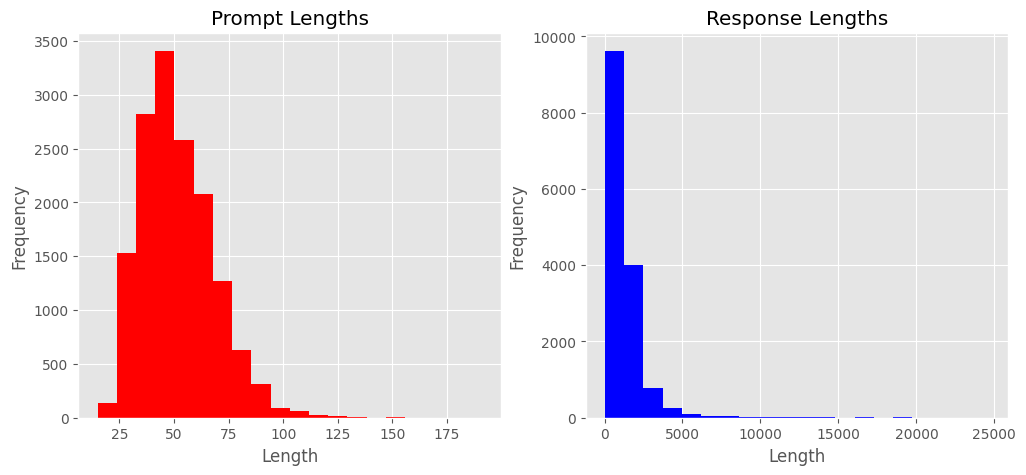

In [23]:
# Création d'une figure avec deux sous-graphiques côte à côte pour comparer la distribution des longueurs de 'prompt' et 'response'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Premier histogramme : distribution des longueurs des 'prompts'
ax1.hist(df['prompt'].apply(len), color='red', bins=20)
ax1.set_title('Prompt Lengths')  # Titre du premier histogramme
ax1.set_xlabel('Length')         # Étiquette de l'axe x
ax1.set_ylabel('Frequency')       # Étiquette de l'axe y

# Deuxième histogramme : distribution des longueurs des 'responses'
ax2.hist(df['response'].apply(len), color='blue', bins=20)
ax2.set_title('Response Lengths') # Titre du second histogramme
ax2.set_xlabel('Length')          # Étiquette de l'axe x
ax2.set_ylabel('Frequency')       # Étiquette de l'axe y

# Affichage de la figure avec les deux sous-graphiques
plt.show()


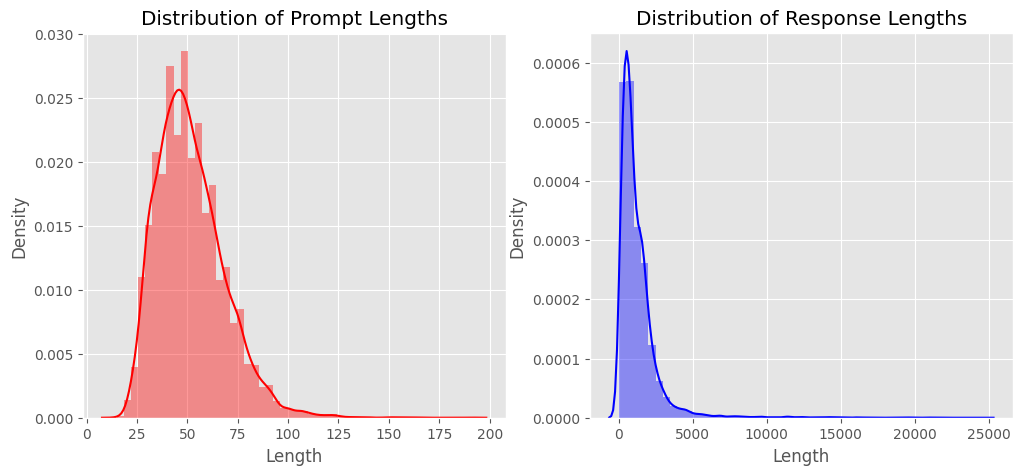

In [24]:
# Création d'une figure avec deux sous-graphiques côte à côte pour visualiser la distribution des longueurs de 'prompt' et 'response'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Distribution des longueurs des 'prompts' avec une courbe de densité KDE
sns.distplot(df['prompt'].apply(len), kde=True, color='red', ax=ax1)
ax1.set_title('Distribution of Prompt Lengths')  # Titre du premier graphique
ax1.set_xlabel('Length')                         # Étiquette de l'axe x
ax1.set_ylabel('Density')                        # Étiquette de l'axe y

# Distribution des longueurs des 'responses' avec une courbe de densité KDE
sns.distplot(df['response'].apply(len), kde=True, color='blue', ax=ax2)
ax2.set_title('Distribution of Response Lengths') # Titre du second graphique
ax2.set_xlabel('Length')                          # Étiquette de l'axe x
ax2.set_ylabel('Density')                         # Étiquette de l'axe y

# Affichage de la figure avec les deux distributions
plt.show()

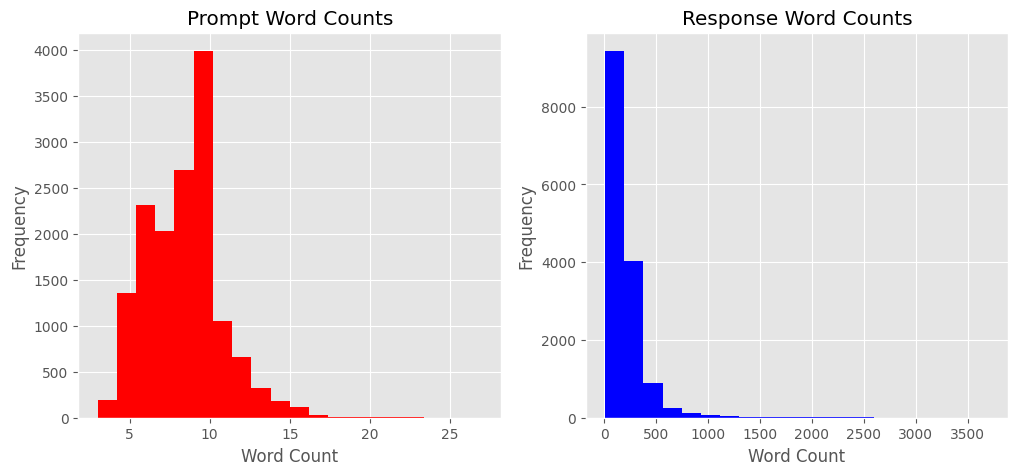

In [25]:
# Ajout d'une colonne pour le nombre de mots dans chaque 'prompt'
df['prompt_word_count'] = df['prompt'].apply(lambda x: len(x.split()))

# Ajout d'une colonne pour le nombre de mots dans chaque 'response'
df['response_word_count'] = df['response'].apply(lambda x: len(x.split()))

# Création d'une figure avec deux sous-graphiques pour visualiser la distribution des comptes de mots de 'prompt' et 'response'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogramme pour la distribution des comptes de mots dans 'prompt'
ax1.hist(df['prompt_word_count'], color='red', bins=20)
ax1.set_title('Prompt Word Counts')   # Titre du premier histogramme
ax1.set_xlabel('Word Count')          # Étiquette de l'axe x
ax1.set_ylabel('Frequency')           # Étiquette de l'axe y

# Histogramme pour la distribution des comptes de mots dans 'response'
ax2.hist(df['response_word_count'], color='blue', bins=20)
ax2.set_title('Response Word Counts') # Titre du second histogramme
ax2.set_xlabel('Word Count')          # Étiquette de l'axe x
ax2.set_ylabel('Frequency')           # Étiquette de l'axe y

# Affichage de la figure avec les deux sous-graphiques
plt.show()


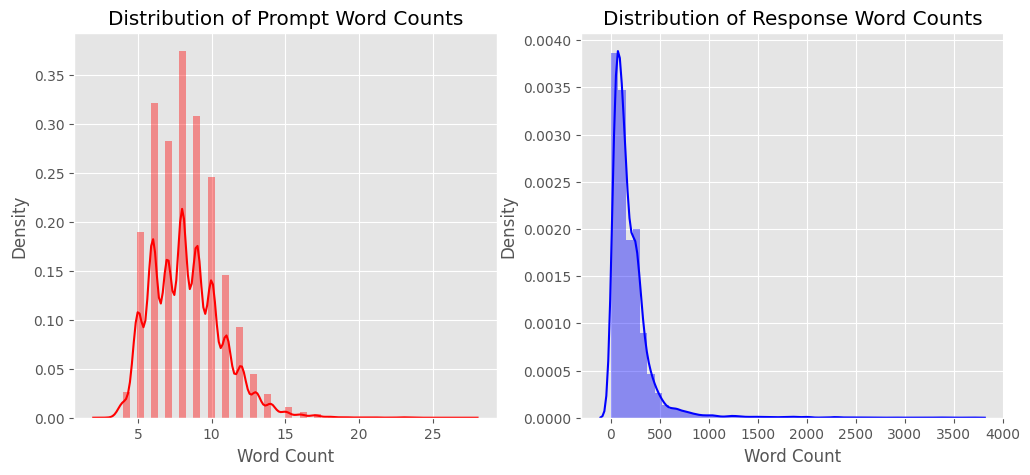

In [26]:
# Création d'une figure avec deux sous-graphiques pour visualiser la distribution des comptes de mots de 'prompt' et 'response' avec une courbe de densité
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Distribution des comptes de mots dans 'prompt' avec une courbe de densité KDE
sns.distplot(df['prompt_word_count'], kde=True, color='red', ax=ax1)
ax1.set_title('Distribution of Prompt Word Counts')  # Titre du premier graphique
ax1.set_xlabel('Word Count')                         # Étiquette de l'axe x
ax1.set_ylabel('Density')                            # Étiquette de l'axe y

# Distribution des comptes de mots dans 'response' avec une courbe de densité KDE
sns.distplot(df['response_word_count'], kde=True, color='blue', ax=ax2)
ax2.set_title('Distribution of Response Word Counts') # Titre du second graphique
ax2.set_xlabel('Word Count')                          # Étiquette de l'axe x
ax2.set_ylabel('Density')                             # Étiquette de l'axe y

# Affichage de la figure avec les deux distributions de densité
plt.show()

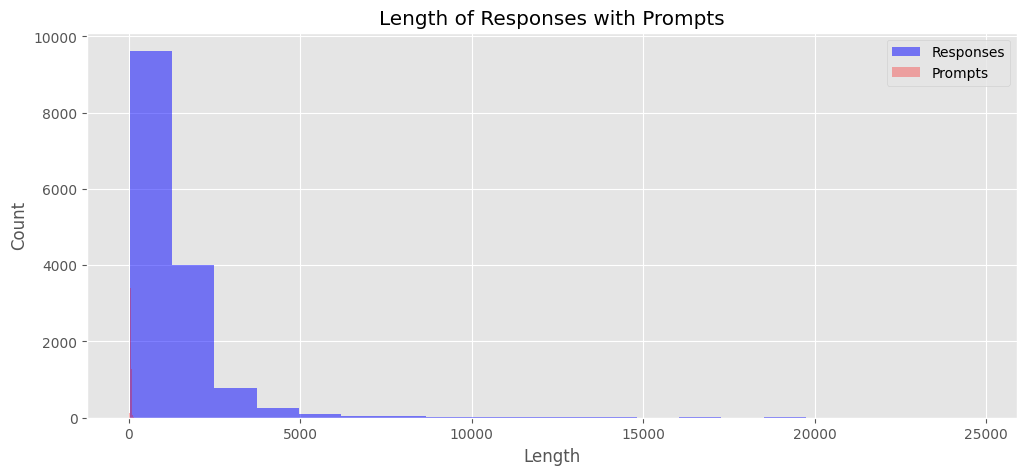

In [27]:
# Création d'une figure pour comparer la distribution des longueurs de 'response' et 'prompt' dans un même histogramme
plt.figure(figsize=(12, 5))

# Histogramme pour la distribution des longueurs de 'response' avec une transparence de 0.5 et couleur bleue
plt.hist(df['response'].apply(len), bins=20, alpha=0.5, color='blue', label='Responses')
plt.xlabel('Length')  # Étiquette de l'axe x
plt.ylabel('Count')   # Étiquette de l'axe y
plt.legend()          # Affichage de la légende pour 'Responses'

# Histogramme pour la distribution des longueurs de 'prompt' avec une transparence de 0.3 et couleur rouge
plt.hist(df['prompt'].apply(len), bins=20, alpha=0.3, color='red', label='Prompts')
plt.legend()          # Affichage de la légende pour 'Prompts'

# Titre du graphique
plt.title('Length of Responses with Prompts')

# Affichage de la figure combinée
plt.show()

## Save Final Data

In [28]:
# Sauvegarde du DataFrame 'df' combiné dans un nouveau fichier CSV nommé 'final_data.csv'
df.to_csv('final_data.csv', index=False)

# Confirmation que les données finales ont été sauvegardées
print("final data saved")

final data saved
